Chia dataset

In [4]:
import shutil
import os
from sklearn.model_selection import train_test_split

def split_dataset(input_dir, output_dir, train_ratio, val_ratio, test_ratio):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for char_folder in os.listdir(input_dir):
        char_path = os.path.join(input_dir, char_folder)

        if os.path.isdir(char_path):
            # Lấy tất cả file ảnh trong thư mục ký tự
            images = os.listdir(char_path)
            train_files, test_val_files = train_test_split(images, test_size=(val_ratio + test_ratio), random_state=42)
            val_files, test_files = train_test_split(test_val_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

            # Tạo các thư mục train, val, test
            for split, files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
                split_dir = os.path.join(output_dir, split, char_folder)
                os.makedirs(split_dir, exist_ok=True)

                for file in files:
                    src_path = os.path.join(char_path, file)
                    dst_path = os.path.join(split_dir, file)
                    shutil.copy(src_path, dst_path)

    print(f"Dataset đã được chia thành các thư mục: {output_dir}/train, {output_dir}/val, {output_dir}/test")

# Thực hiện chia dataset
input_dir = 'E:/WorkspaceHDD/Python/NhatKiTu/processed_images_3000'
output_dir = './dataset/split_dataset'  # Thư mục chứa kết quả chia
split_dataset(input_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)


Dataset đã được chia thành các thư mục: ./dataset/split_dataset/train, ./dataset/split_dataset/val, ./dataset/split_dataset/test


Huấn luyện mô hình

Found 67093 images belonging to 32 classes.
Found 14377 images belonging to 32 classes.
Found 14378 images belonging to 32 classes.


D:\env-NhanDienBienSoXe\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,544 (736.50 KB)

 Trainable params: 188,544 (736.50 KB)

 Non-trainable params: 0 (0.00 B)

D:\env-NhanDienBienSoXe\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5250 - loss: 1.5373

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 300s 284ms/step - accuracy: 0.5252 - loss: 1.5366 - val_accuracy: 0.9388 - val_loss: 0.1519 - learning_rate: 0.0010
Epoch 2/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9296 - loss: 0.2098

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 74s 70ms/step - accuracy: 0.9296 - loss: 0.2098 - val_accuracy: 0.9808 - val_loss: 0.0670 - learning_rate: 0.0010
Epoch 3/50
1048/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9611 - loss: 0.1272

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 70s 67ms/step - accuracy: 0.9611 - loss: 0.1272 - val_accuracy: 0.9834 - val_loss: 0.0553 - learning_rate: 0.0010
Epoch 4/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9700 - loss: 0.0991

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 70s 67ms/step - accuracy: 0.9700 - loss: 0.0991 - val_accuracy: 0.9880 - val_loss: 0.0448 - learning_rate: 0.0010
Epoch 5/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 71s 67ms/step - accuracy: 0.9742 - loss: 0.0867 - val_accuracy: 0.9872 - val_loss: 0.0440 - learning_rate: 0.0010
Epoch 6/50
1048/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9750 - loss: 0.0833

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 74s 70ms/step - accuracy: 0.9750 - loss: 0.0833 - val_accuracy: 0.9895 - val_loss: 0.0391 - learning_rate: 0.0010
Epoch 7/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9803 - loss: 0.0667

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.9803 - loss: 0.0667 - val_accuracy: 0.9902 - val_loss: 0.0343 - learning_rate: 0.0010
Epoch 8/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9827 - loss: 0.0583

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 74s 70ms/step - accuracy: 0.9827 - loss: 0.0583 - val_accuracy: 0.9910 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 9/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9825 - loss: 0.0591

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 76s 72ms/step - accuracy: 0.9825 - loss: 0.0591 - val_accuracy: 0.9923 - val_loss: 0.0271 - learning_rate: 0.0010
Epoch 10/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9856 - loss: 0.0517

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 71s 68ms/step - accuracy: 0.9856 - loss: 0.0517 - val_accuracy: 0.9929 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 11/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9858 - loss: 0.0487

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 77s 74ms/step - accuracy: 0.9858 - loss: 0.0487 - val_accuracy: 0.9933 - val_loss: 0.0256 - learning_rate: 0.0010
Epoch 12/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.9873 - loss: 0.0438 - val_accuracy: 0.9917 - val_loss: 0.0298 - learning_rate: 0.0010
Epoch 13/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 70s 67ms/step - accuracy: 0.9880 - loss: 0.0403 - val_accuracy: 0.9921 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 14/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 68s 65ms/step - accuracy: 0.9881 - loss: 0.0406 - val_accuracy: 0.9929 - val_loss: 0.0303 - learning_rate: 0.0010
Epoch 15/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 68s 65ms/step - accuracy: 0.9882 - loss: 0.0429 - val_accuracy: 0.9926 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 16/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9904 - loss: 0.0348
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.9922 - loss: 0.0293 - val_accuracy: 0.9944 - val_loss: 0.0205 - learning_rate: 2.0000e-04
Epoch 18/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9943 - loss: 0.0203

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.9943 - loss: 0.0203 - val_accuracy: 0.9947 - val_loss: 0.0206 - learning_rate: 2.0000e-04
Epoch 19/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9947 - loss: 0.0185

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 68s 65ms/step - accuracy: 0.9947 - loss: 0.0185 - val_accuracy: 0.9949 - val_loss: 0.0211 - learning_rate: 2.0000e-04
Epoch 20/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9952 - loss: 0.0170

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 69s 66ms/step - accuracy: 0.9952 - loss: 0.0170 - val_accuracy: 0.9951 - val_loss: 0.0197 - learning_rate: 2.0000e-04
Epoch 21/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 68s 65ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.9949 - val_loss: 0.0216 - learning_rate: 2.0000e-04
Epoch 22/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 69s 65ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9950 - val_loss: 0.0209 - learning_rate: 2.0000e-04
Epoch 23/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9957 - loss: 0.0148

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 69s 66ms/step - accuracy: 0.9957 - loss: 0.0148 - val_accuracy: 0.9952 - val_loss: 0.0215 - learning_rate: 2.0000e-04
Epoch 24/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9957 - loss: 0.0144

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 72s 69ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9953 - val_loss: 0.0220 - learning_rate: 2.0000e-04
Epoch 25/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.9962 - loss: 0.0142 - val_accuracy: 0.9949 - val_loss: 0.0230 - learning_rate: 2.0000e-04
Epoch 26/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9959 - loss: 0.0144

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 75s 72ms/step - accuracy: 0.9959 - loss: 0.0144 - val_accuracy: 0.9953 - val_loss: 0.0201 - learning_rate: 2.0000e-04
Epoch 27/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9962 - loss: 0.0133

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9955 - val_loss: 0.0218 - learning_rate: 2.0000e-04
Epoch 28/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9966 - loss: 0.0113

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 69s 66ms/step - accuracy: 0.9966 - loss: 0.0113 - val_accuracy: 0.9959 - val_loss: 0.0225 - learning_rate: 2.0000e-04
Epoch 29/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 72s 69ms/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 0.9952 - val_loss: 0.0229 - learning_rate: 2.0000e-04
Epoch 30/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.9962 - loss: 0.0126 - val_accuracy: 0.9954 - val_loss: 0.0216 - learning_rate: 2.0000e-04
Epoch 31/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 63s 60ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.9955 - val_loss: 0.0209 - learning_rate: 2.0000e-04
Epoch 32/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 69s 65ms/step - accuracy: 0.9960 - loss: 0.0128 - val_accuracy: 0.9959 - val_loss: 0.0212 - learning_rate: 2.0000e-04
Epoch 33/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9965 - loss: 0.0115
Epoch 33: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 69s 66ms

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.9972 - loss: 0.0100 - val_accuracy: 0.9961 - val_loss: 0.0196 - learning_rate: 4.0000e-05
Epoch 37/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 77s 73ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9958 - val_loss: 0.0210 - learning_rate: 4.0000e-05
Epoch 38/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9975 - loss: 0.0090 - val_accuracy: 0.9956 - val_loss: 0.0214 - learning_rate: 4.0000e-05
Epoch 39/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9973 - loss: 0.0088

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 98s 93ms/step - accuracy: 0.9973 - loss: 0.0088 - val_accuracy: 0.9962 - val_loss: 0.0211 - learning_rate: 4.0000e-05
Epoch 40/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 110s 105ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9961 - val_loss: 0.0206 - learning_rate: 4.0000e-05
Epoch 41/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9974 - loss: 0.0094
Epoch 41: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 101s 96ms/step - accuracy: 0.9974 - loss: 0.0094 - val_accuracy: 0.9960 - val_loss: 0.0200 - learning_rate: 4.0000e-05
Epoch 42/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 73s 69ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9962 - val_loss: 0.0201 - learning_rate: 8.0000e-06
Epoch 43/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9961 - val_loss: 0.0202 - learning_rate: 8.0000e-06
Epoch 44/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 65m

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 76s 73ms/step - accuracy: 0.9977 - loss: 0.0081 - val_accuracy: 0.9963 - val_loss: 0.0200 - learning_rate: 8.0000e-06
Epoch 45/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9974 - loss: 0.0094 - val_accuracy: 0.9963 - val_loss: 0.0201 - learning_rate: 8.0000e-06
Epoch 46/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9962 - val_loss: 0.0204 - learning_rate: 8.0000e-06
Epoch 47/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9977 - loss: 0.0077

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 92s 88ms/step - accuracy: 0.9977 - loss: 0.0077 - val_accuracy: 0.9964 - val_loss: 0.0205 - learning_rate: 8.0000e-06
Epoch 48/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 85s 81ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9961 - val_loss: 0.0208 - learning_rate: 8.0000e-06
Epoch 49/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9973 - loss: 0.0090
Epoch 49: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.9963 - val_loss: 0.0205 - learning_rate: 8.0000e-06
Epoch 50/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.9977 - loss: 0.0077 - val_accuracy: 0.9963 - val_loss: 0.0206 - learning_rate: 1.6000e-06


Huấn luyện hoàn tất và mô hình đã được lưu!


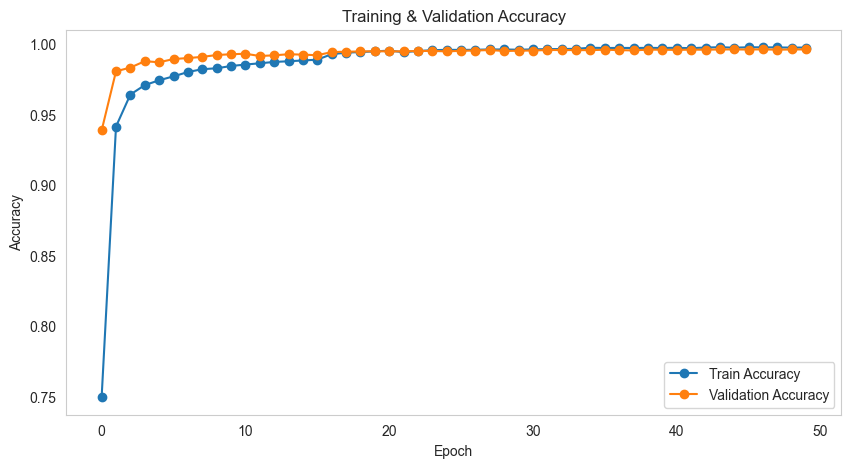

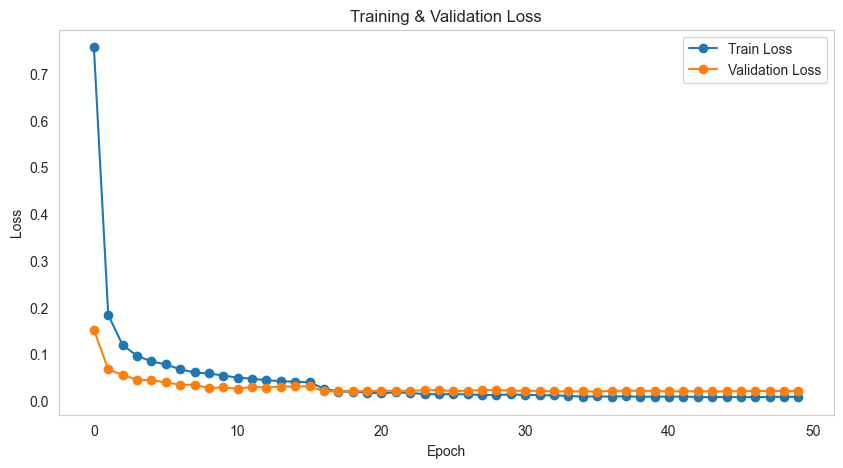

Lịch sử huấn luyện đã được lưu vào training_history.csv


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np


# 1. Đường dẫn dữ liệu
base_dir = './dataset/split_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# 2. ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

# 3. Load dữ liệu từ thư mục
batch_size = 64
image_size = (28, 28)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Đường dẫn đến thư mục train
    target_size=image_size, # Resize ảnh về 28x28 pixel
    batch_size=batch_size, # Số lượng ảnh mỗi batch
    class_mode='categorical', # One-hot encoding cho nhãn
    shuffle=True, # Xáo trộn dữ liệu học tránh overfiting
    color_mode='grayscale' # Chuyển ảnh thành ảnh xám (1 kênh màu)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale'
)


# 4. Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Số lớp = số ký tự
])
model.summary()

# 5. Biên dịch mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Thêm callback để giảm tốc độ học và lưu mô hình tốt nhất
checkpoint = ModelCheckpoint('cnn/model/license_plate_char.h5',
                             save_best_only=True,
                             monitor='val_accuracy',
                             mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=5,
                              verbose=1)

# 7. Huấn luyện mô hình
epochs = 50

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# 8. Lưu mô hình
model.save('cnn/model/license_plate_char_pro_max.h5')

print("Huấn luyện hoàn tất và mô hình đã được lưu!")


# Vẽ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.grid()
plt.savefig('cnn/accuracy_plot.png')  # Lưu ảnh

# Vẽ Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.grid()
plt.savefig('cnn/loss_plot.png')

plt.show()

history_df = pd.DataFrame(history.history)
history_df.to_csv('cnn/training_history.csv', index=False)
print("Lịch sử huấn luyện đã được lưu vào training_history.csv")

D:\env-NhanDienBienSoXe\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 147ms/step


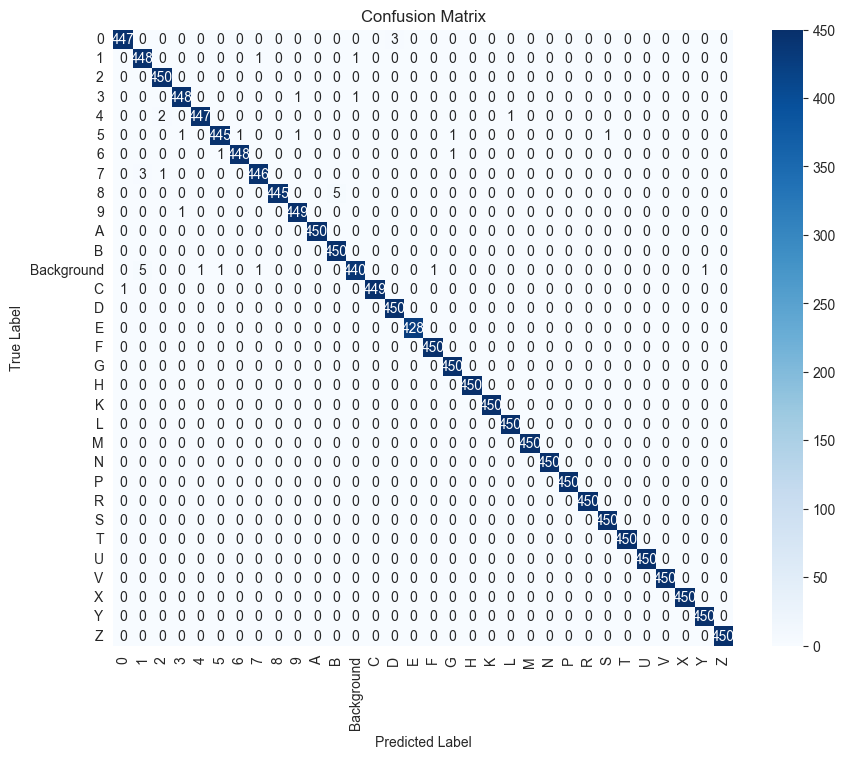

In [25]:
from tensorflow.keras import Sequential
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Dự đoán trên tập test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Lấy danh sách tên lớp
class_names = list(test_generator.class_indices.keys())

# Tạo confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig('cnn/confusion_matrix.png')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
char_1.png -> Background
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
char_10.png -> 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
char_2.png -> 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
char_3.png -> 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
char_4.png -> A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
char_5.png -> 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
char_6.png -> 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
char_7.png -> 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
char_8.png -> 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
char_9.png -> Background


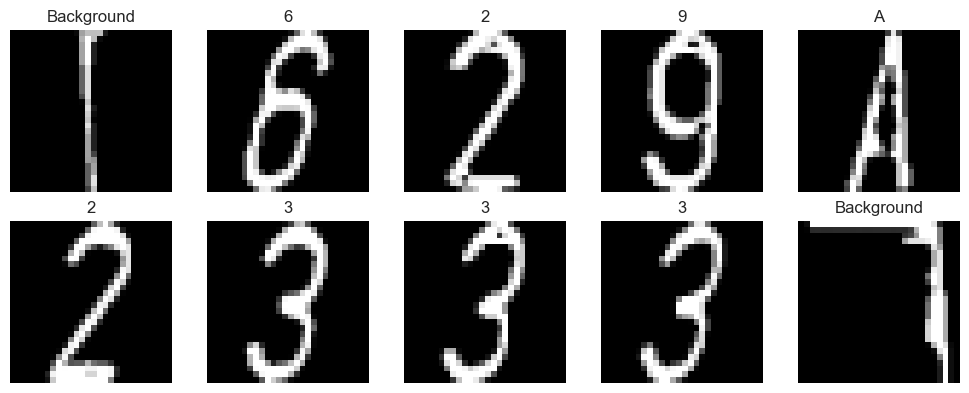

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

# Load mô hình nhận diện ký tự
model = load_model("cnn/model/license_plate_char_pro_max.h5")

# Danh sách class tĩnh
ALPHA_DICT = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'Background', 13: 'C', 14: 'D', 15: 'E', 16: 'F', 17: 'G', 18: 'H',
    19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'P', 24: 'R', 25: 'S', 26: 'T', 27: 'U',
    28: 'V', 29: 'X', 30: 'Y', 31: 'Z'
}

# Thư mục chứa ảnh các ký tự
char_folder = r"E:\WorkspaceHDD\DoAn\VIETNAMESE-LICENSE-PLATE\Traning-cnn\segment-char\29A-23336"

recognized_chars = []
char_images = []

# Đọc ảnh và nhận diện ký tự
for filename in sorted(os.listdir(char_folder)):
    img_path = os.path.join(char_folder, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Không thể đọc {img_path}")
        continue

    img = img.astype('float32') / 255.0
    img_input = np.expand_dims(img, axis=0)
    img_input = np.expand_dims(img_input, axis=-1)

    # Dự đoán ký tự
    pred = model.predict(img_input)
    class_index = np.argmax(pred)
    recognized_char = ALPHA_DICT.get(class_index, "?")  # Lấy ký tự từ dictionary

    recognized_chars.append(recognized_char)
    char_images.append((img, recognized_char))

    print(f"{filename} -> {recognized_char}")

# Hiển thị ảnh và nhãn dự đoán
cols = 5
rows = (len(char_images) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

for i, (char_img, char_label) in enumerate(char_images):
    axes[i].imshow(char_img, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"{char_label}")

for i in range(len(char_images), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


Found 67093 images belonging to 32 classes.
Found 14377 images belonging to 32 classes.
Found 14378 images belonging to 32 classes.


D:\Tien\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        16,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,792 (1.41 MB)

 Trainable params: 369,344 (1.41 MB)

 Non-trainable params: 448 (1.75 KB)

D:\Tien\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6740 - loss: 1.1115

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 181s 161ms/step - accuracy: 0.6741 - loss: 1.1109 - val_accuracy: 0.9711 - val_loss: 0.0979 - learning_rate: 0.0010
Epoch 2/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9616 - loss: 0.1376

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 157s 150ms/step - accuracy: 0.9616 - loss: 0.1376 - val_accuracy: 0.9801 - val_loss: 0.0663 - learning_rate: 0.0010
Epoch 3/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9698 - loss: 0.1044

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 155s 148ms/step - accuracy: 0.9698 - loss: 0.1043 - val_accuracy: 0.9833 - val_loss: 0.0533 - learning_rate: 0.0010
Epoch 4/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9760 - loss: 0.0821

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 158s 150ms/step - accuracy: 0.9760 - loss: 0.0821 - val_accuracy: 0.9874 - val_loss: 0.0507 - learning_rate: 0.0010
Epoch 5/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9784 - loss: 0.0761

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 144ms/step - accuracy: 0.9784 - loss: 0.0761 - val_accuracy: 0.9892 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 6/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 148s 141ms/step - accuracy: 0.9819 - loss: 0.0670 - val_accuracy: 0.9881 - val_loss: 0.0408 - learning_rate: 0.0010
Epoch 7/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9826 - loss: 0.0646 - val_accuracy: 0.9886 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 8/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 147s 140ms/step - accuracy: 0.9842 - loss: 0.0581 - val_accuracy: 0.9887 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 9/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9864 - loss: 0.0493

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 150s 143ms/step - accuracy: 0.9864 - loss: 0.0493 - val_accuracy: 0.9909 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 10/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9865 - loss: 0.0497

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 158s 151ms/step - accuracy: 0.9865 - loss: 0.0497 - val_accuracy: 0.9919 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 11/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9862 - loss: 0.0485

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 162s 154ms/step - accuracy: 0.9862 - loss: 0.0484 - val_accuracy: 0.9927 - val_loss: 0.0274 - learning_rate: 0.0010
Epoch 12/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9885 - loss: 0.0408 - val_accuracy: 0.9899 - val_loss: 0.0389 - learning_rate: 0.0010
Epoch 13/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 143ms/step - accuracy: 0.9878 - loss: 0.0429 - val_accuracy: 0.9919 - val_loss: 0.0307 - learning_rate: 0.0010
Epoch 14/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 156s 149ms/step - accuracy: 0.9885 - loss: 0.0409 - val_accuracy: 0.9916 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 15/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9904 - loss: 0.0345

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 148s 141ms/step - accuracy: 0.9904 - loss: 0.0345 - val_accuracy: 0.9928 - val_loss: 0.0327 - learning_rate: 0.0010
Epoch 16/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 150s 143ms/step - accuracy: 0.9897 - loss: 0.0389 - val_accuracy: 0.9914 - val_loss: 0.0346 - learning_rate: 0.0010
Epoch 17/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 148s 141ms/step - accuracy: 0.9895 - loss: 0.0400 - val_accuracy: 0.9909 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 18/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 163s 155ms/step - accuracy: 0.9902 - loss: 0.0358 - val_accuracy: 0.9927 - val_loss: 0.0279 - learning_rate: 0.0010
Epoch 19/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9900 - loss: 0.0356

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 144ms/step - accuracy: 0.9900 - loss: 0.0356 - val_accuracy: 0.9931 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 20/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9918 - loss: 0.0323

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9918 - loss: 0.0323 - val_accuracy: 0.9944 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 21/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 165s 157ms/step - accuracy: 0.9928 - loss: 0.0270 - val_accuracy: 0.9939 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 22/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 162s 154ms/step - accuracy: 0.9922 - loss: 0.0297 - val_accuracy: 0.9935 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 23/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9918 - loss: 0.0343

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 156s 149ms/step - accuracy: 0.9918 - loss: 0.0343 - val_accuracy: 0.9947 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 24/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9930 - loss: 0.0270 - val_accuracy: 0.9945 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 25/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 159s 152ms/step - accuracy: 0.9930 - loss: 0.0261 - val_accuracy: 0.9930 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 26/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9928 - loss: 0.0297

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 157s 149ms/step - accuracy: 0.9928 - loss: 0.0297 - val_accuracy: 0.9950 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 27/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9933 - loss: 0.0265 - val_accuracy: 0.9942 - val_loss: 0.0263 - learning_rate: 0.0010
Epoch 28/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9914 - loss: 0.0315 - val_accuracy: 0.9945 - val_loss: 0.0264 - learning_rate: 0.0010
Epoch 29/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 159s 151ms/step - accuracy: 0.9934 - loss: 0.0269 - val_accuracy: 0.9949 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 30/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 155s 148ms/step - accuracy: 0.9935 - loss: 0.0262 - val_accuracy: 0.9937 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 31/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9943 - loss: 0.0214
Epoch 31: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 151s 144ms/step -

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 147s 140ms/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9956 - val_loss: 0.0244 - learning_rate: 2.0000e-04
Epoch 33/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9960 - loss: 0.0137

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 146s 140ms/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9958 - val_loss: 0.0240 - learning_rate: 2.0000e-04
Epoch 34/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9964 - loss: 0.0121

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9964 - val_loss: 0.0236 - learning_rate: 2.0000e-04
Epoch 35/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 150s 143ms/step - accuracy: 0.9973 - loss: 0.0104 - val_accuracy: 0.9961 - val_loss: 0.0248 - learning_rate: 2.0000e-04
Epoch 36/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 153s 146ms/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 0.9964 - val_loss: 0.0239 - learning_rate: 2.0000e-04
Epoch 37/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 159s 152ms/step - accuracy: 0.9976 - loss: 0.0088 - val_accuracy: 0.9961 - val_loss: 0.0230 - learning_rate: 2.0000e-04
Epoch 38/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 166s 158ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 0.9960 - val_loss: 0.0248 - learning_rate: 2.0000e-04
Epoch 39/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9983 - loss: 0.0061
Epoch 39: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1049/1049 ━━━━━━━━━━━━━━━━━━

Huấn luyện hoàn tất và mô hình đã được lưu!


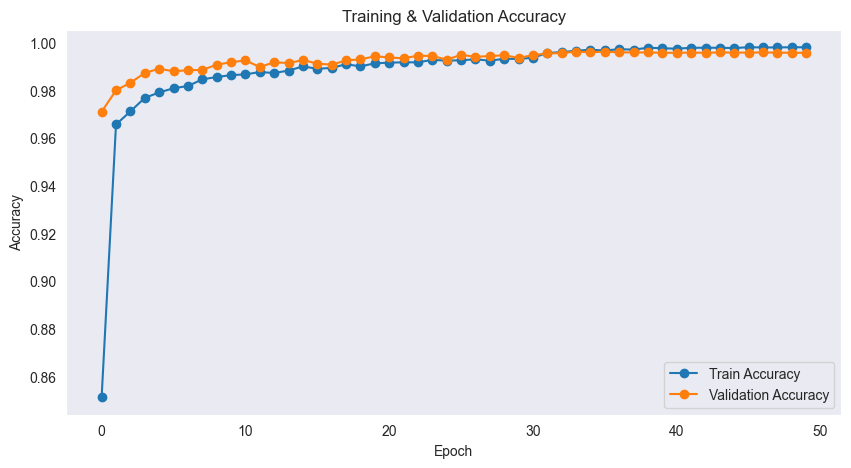

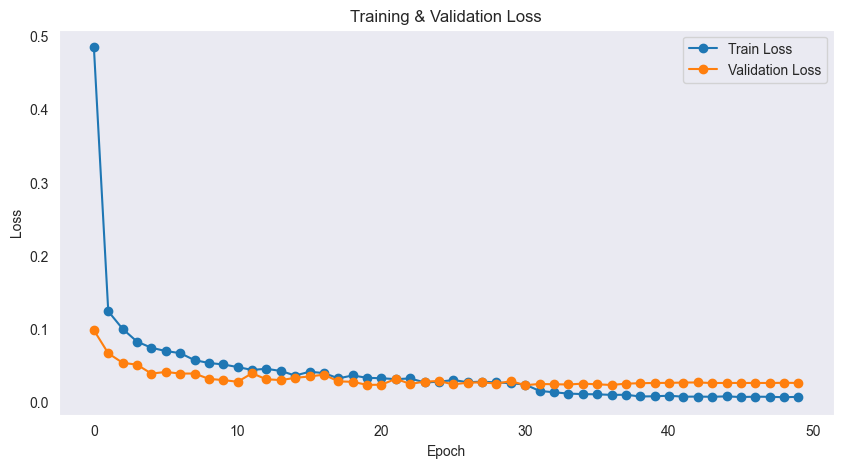

Lịch sử huấn luyện đã được lưu vào training_history.csv


In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from tensorflow.keras.layers import BatchNormalization



# 1. Đường dẫn dữ liệu
base_dir = './dataset/split_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# 2. ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

# 3. Load dữ liệu từ thư mục
batch_size = 64
image_size = (28, 28)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Đường dẫn đến thư mục train
    target_size=image_size, # Resize ảnh về 28x28 pixel
    batch_size=batch_size, # Số lượng ảnh mỗi batch
    class_mode='categorical', # One-hot encoding cho nhãn
    shuffle=True, # Xáo trộn dữ liệu học tránh overfiting
    color_mode='grayscale' # Chuyển ảnh thành ảnh xám (1 kênh màu)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale'
)


# 4. Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

# 5. Biên dịch mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Thêm callback để giảm tốc độ học và lưu mô hình tốt nhất
checkpoint = ModelCheckpoint('cnn1/model/license_plate_char_best.h5',
                             save_best_only=True,
                             monitor='val_accuracy',
                             mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=5,
                              verbose=1)

# 7. Huấn luyện mô hình
epochs = 50

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# 8. Lưu mô hình
model.save('cnn1/model/license_plate_char_last.h5')

print("Huấn luyện hoàn tất và mô hình đã được lưu!")


# Vẽ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.grid()
plt.savefig('cnn1/accuracy_plot.png')  # Lưu ảnh

# Vẽ Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.grid()
plt.savefig('cnn1/loss_plot.png')

plt.show()

history_df = pd.DataFrame(history.history)
history_df.to_csv('cnn1/training_history.csv', index=False)
print("Lịch sử huấn luyện đã được lưu vào training_history.csv")

D:\Tien\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step


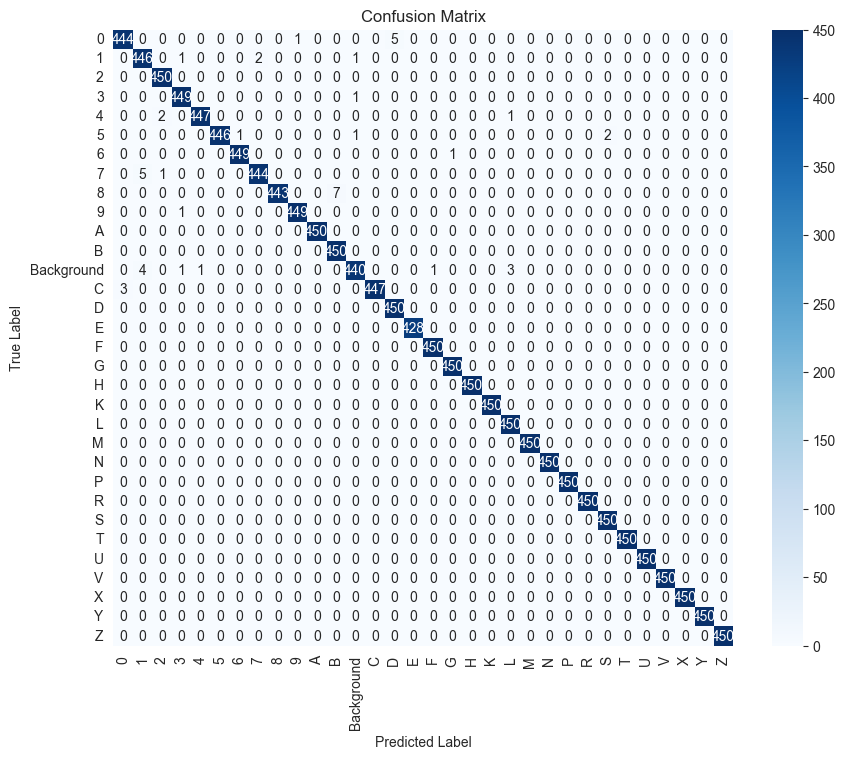

In [6]:
from tensorflow.keras import Sequential
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Dự đoán trên tập test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Lấy danh sách tên lớp
class_names = list(test_generator.class_indices.keys())

# Tạo confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig('cnn1/confusion_matrix.png')
plt.show()
